In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"black", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}
import gc
gc.enable()
from scipy.optimize import curve_fit

/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-i01/j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


In [2]:
date = "20230224"
tau = 8000
matched = getters.get_processed_data(path+date+"/")
print(matched.columns)

Index(['Timestamp', 'humiObRH', 'humiObRH_err', 'humiRH', 'humiRH_err',
       'humiObT', 'humiObT_err', 'humiT', 'humiT_err', 'pavWav1-1',
       'pavWav1-1_err', 'pavWav1-2', 'pavWav1-2_err', 'pavWav1-3',
       'pavWav1-3_err', 'pavWav1-4', 'pavWav1-4_err', 'pavWav1-5',
       'pavWav1-5_err', 'pavWav2-1', 'pavWav2-1_err', 'pavWav2-2',
       'pavWav2-2_err', 'pavWav2-3', 'pavWav2-3_err', 'pavWav2-4',
       'pavWav2-4_err', 'ppWav1-1', 'ppWav1-1_err', 'ppWav1-2', 'ppWav1-2_err',
       'ppWav1-3', 'ppWav1-3_err', 'ppWav1-4', 'ppWav1-4_err', 'ppWav1-5',
       'ppWav1-5_err', 'ppWav2-1', 'ppWav2-1_err', 'ppWav2-2', 'ppWav2-2_err',
       'ppWav2-3', 'ppWav2-3_err', 'ppWav2-4', 'ppWav2-4_err', 'psWav1-1',
       'psWav1-1_err', 'psWav1-2', 'psWav1-2_err', 'psWav1-3', 'psWav1-3_err',
       'psWav1-4', 'psWav1-4_err', 'psWav1-5', 'psWav1-5_err', 'psWav2-1',
       'psWav2-1_err', 'psWav2-2', 'psWav2-2_err', 'psWav2-3', 'psWav2-3_err',
       'psWav2-4', 'psWav2-4_err', 'tempT1', 'temp

In [3]:
def line(x, A, B):
    return A + B*x

AT plateau 243_up
We see a change of -0.002 pm change along the whole plaetau
We should see a change of -3.557 pm change along the whole plaetau
There are 3.555 pm that do not account for T or RH changes
This represents a 158870.03 % of the total change




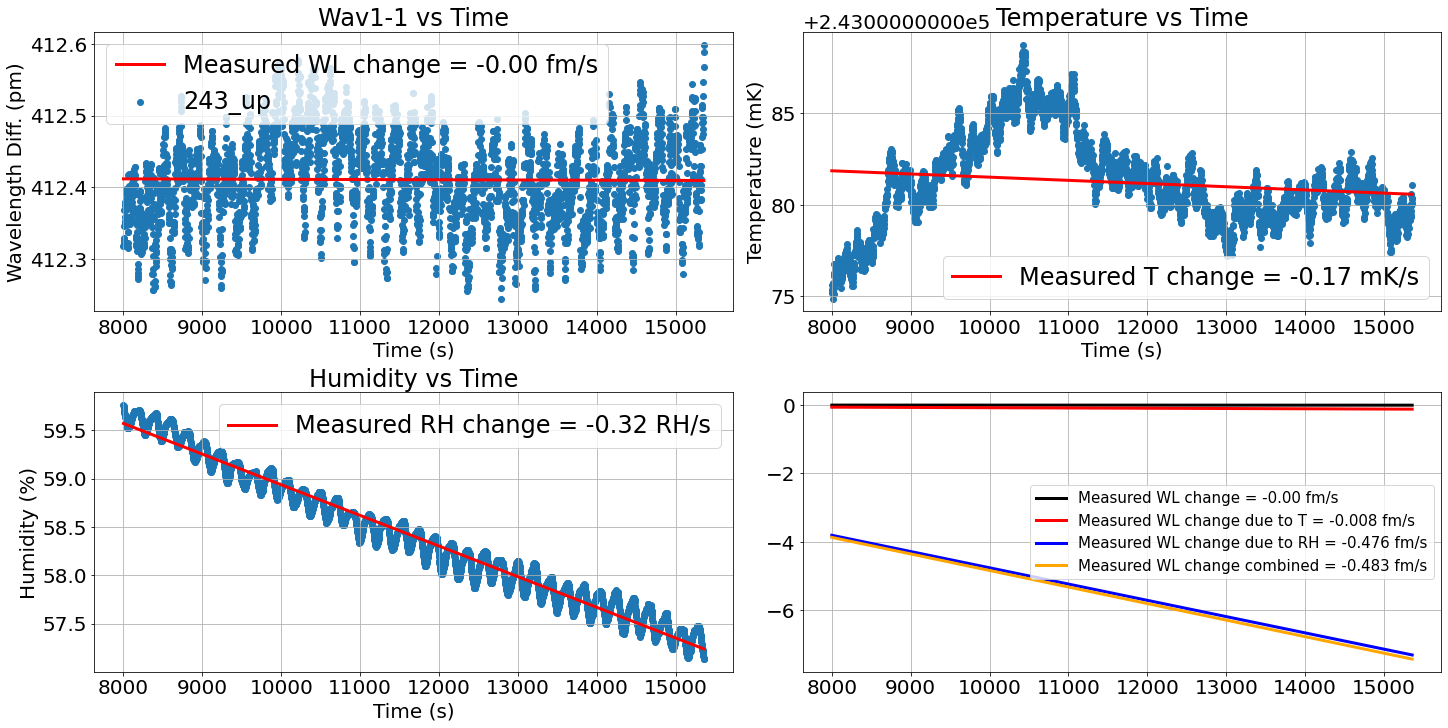

In [4]:
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches((20,10))
for plateau in plateaus[date].keys():
    if "243_up" not in plateau:
        continue
    t0 = plateaus[date]["213_down"][0]
    tf = plateaus[date]["213_down"][1]
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)]
    refval = np.mean(dcut["pavWav1-1"])*1e12
    t0 = plateaus[date][plateau][0]
    tf = plateaus[date][plateau][1]
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)]
    popt, pcov = curve_fit(line, dcut["Timestamp"]-t0, dcut["pavWav1-1"]*1e12 - refval)
    mr = popt[1]
    axes[0].scatter(
        dcut["Timestamp"]-t0,
        dcut["pavWav1-1"]*1e12 - refval,
        label=plateau
    )
    axes[0].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, popt[0], popt[1]),
        color="red",
        label=r"Measured WL change = {0:.2f} fm/s".format(popt[1]*1e3)
    )
    axes[3].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, 0, popt[1]),
        color="black",
        label=r"Measured WL change = {0:.2f} fm/s".format(popt[1]*1e3)
    )
    popt, pcov = curve_fit(line, dcut["Timestamp"]-t0, dcut["tempT2"]*1e3)
    axes[1].scatter(
        dcut["Timestamp"]-t0,
        dcut["tempT2"]*1e3
    )
    axes[1].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, popt[0], popt[1]),
        color="red",
        label=r"Measured T change = {0:.2f} mK/s".format(popt[1]*1e3)
    )
    mt = popt[1]*45.065*1e-3
    axes[3].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, 0, mt),
        color="red",
        label=r"Measured WL change due to T = {0:.3f} fm/s".format(mt*1e3)
    )
    popt, pcov = curve_fit(line, dcut["Timestamp"]-t0, dcut["humiRH"])
    axes[2].scatter(
        dcut["Timestamp"]-t0,
        dcut["humiRH"],
    )
    axes[2].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, popt[0], popt[1]),
        color="red",
        label=r"Measured RH change = {0:.2f} RH/s".format(popt[1]*1e3)
    )
    mrh = popt[1]*(1.5)
    axes[3].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, 0, mrh),
        color="blue",
        label=r"Measured WL change due to RH = {0:.3f} fm/s".format(mrh*1e3)
    )
    m_comb = mt + mrh
    axes[3].plot(
        dcut["Timestamp"]-t0,
        line(dcut["Timestamp"]-t0, 0, m_comb),
        color="orange",
        label=r"Measured WL change combined = {0:.3f} fm/s".format(m_comb*1e3)
    )
    
    deltat = (tf-t0-tau)
    totalchange = mr*deltat
    teoric_change = m_comb*deltat
    unknown_change = totalchange - teoric_change
    print("AT plateau {0}".format(plateau))
    print(r"We see a change of {0:.3f} pm change along the whole plaetau".format(totalchange))
    print(r"We should see a change of {0:.3f} pm change along the whole plaetau".format(teoric_change))
    print(r"There are {0:.3f} pm that do not account for T or RH changes".format(unknown_change))
    print(r"This represents a {0:.2f} % of the total change".format(abs(100*unknown_change/totalchange)))
    print("\n")
axes[0].set_title("Wav1-1 vs Time")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Wavelength Diff. (pm)")
axes[1].set_title("Temperature vs Time")
axes[1].set_ylabel("Temperature (mK)")
axes[1].set_xlabel("Time (s)")
axes[2].set_title("Humidity vs Time")
axes[2].set_ylabel("Humidity (%)")
axes[2].set_xlabel("Time (s)")
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend(fontsize=15)

In [71]:
def get_sens_T(T, A, B, C, D):
    grad = B + 2*C*T + 3*D*T**2
    return grad

27.463785715380254
-76.04292304714136
620930.3735402499


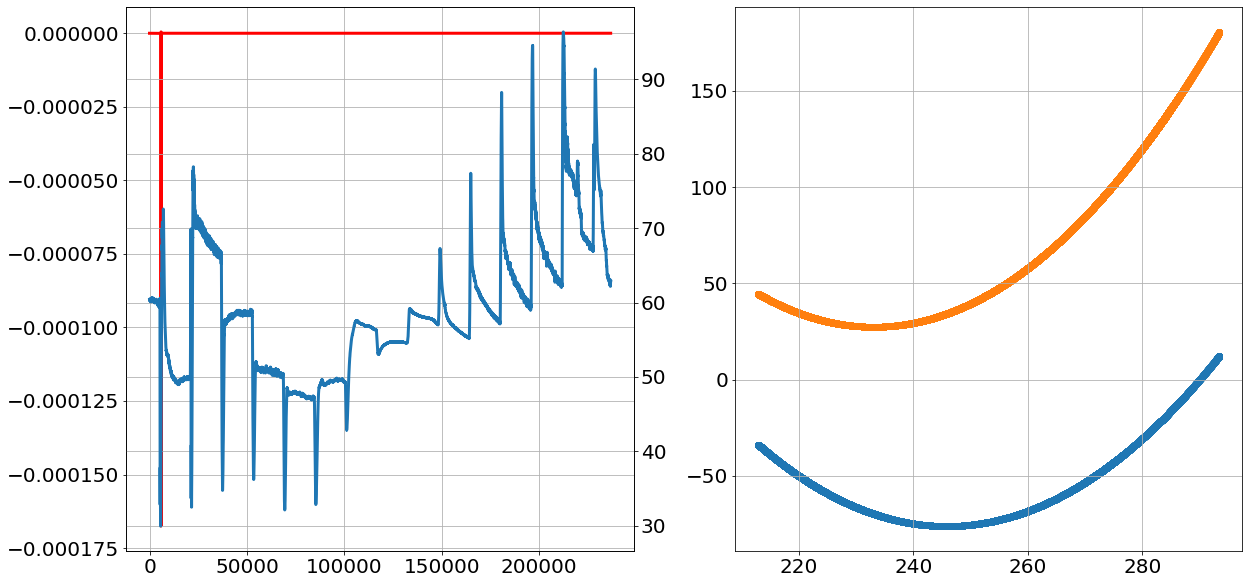

In [72]:
fig, axes = plt.subplots(ncols=2, nrows=1)
twin = axes[0].twinx()
fig.set_size_inches((20,10))
sens_ormt = get_sens_T(matched["tempT1"], -181988, 2309, -9.789, 0.014)
sens_orm = get_sens_T(matched["tempT1"], -181120, 2281.13, -9.588, 0.013)
print(min(sens_ormt))
print(min(sens_orm))
ratio = sens_ormt/sens_orm
print(max(ratio))
axes[0].plot(
    matched["Timestamp"] - matched["Timestamp"][0],
    ((matched["pavWav2-1"]) - (matched["pavWav1-2"]))*(matched["tempT1"]-matched["tempT1"][0])*(ratio),
    color="red"
)
twin.plot(
    matched["Timestamp"] - matched["Timestamp"][0],
    matched["humiRH"]
)
axes[1].scatter(
    matched["tempT1"],
    sens_orm
)
axes[1].scatter(
    matched["tempT1"],
    sens_ormt
)

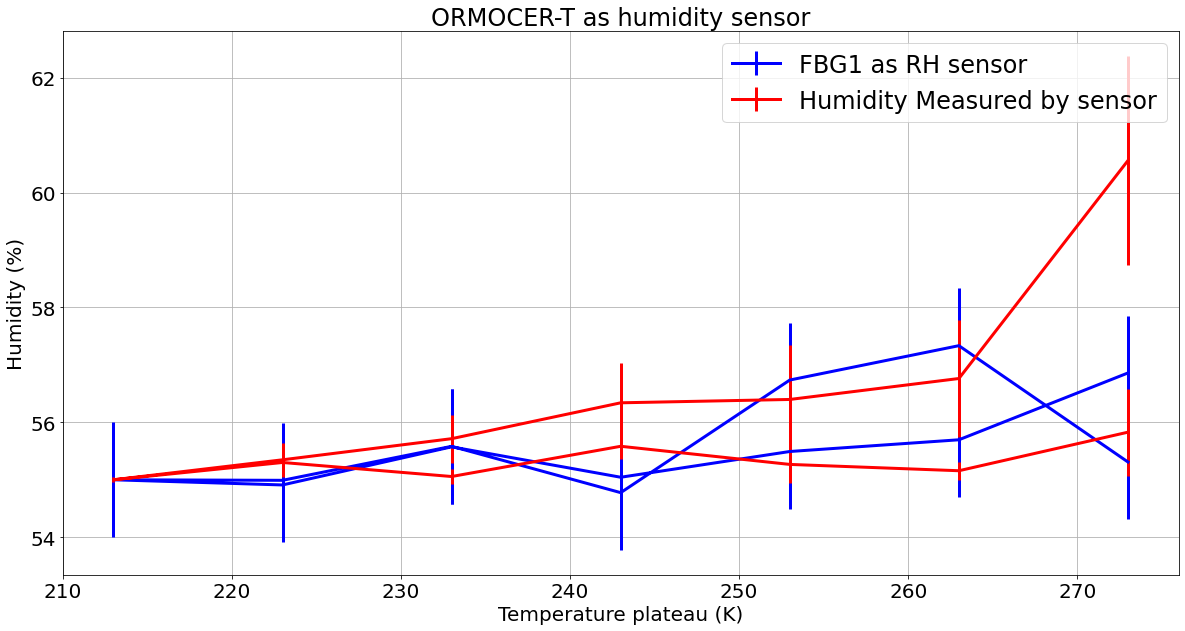

In [53]:
fig, axes = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches((20,10))
changes = []
temps = []
hum_changes = []
hum_changes_err = []
for plateau in plateaus[date].keys():
    if "293" in plateau:
        continue
    if "283" in plateau:
        continue
    t0 = plateaus[date]["213_down"][0]
    tf = plateaus[date]["213_down"][1]
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)]
    refval = np.mean(dcut["pavWav1-1"])*1e12
    t0 = plateaus[date][plateau][0]
    tf = plateaus[date][plateau][1]
    deltat = (tf-t0-tau)
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)].reset_index(drop=True)
    popt, pcov = curve_fit(line, dcut["Timestamp"]-t0, dcut["pavWav1-1"]*1e12 - refval)
    mr = popt[1]
    rchange = mr*deltat
    popt, pcov = curve_fit(line, dcut["Timestamp"]-t0, dcut["tempT2"])
    sens = get_sens_T(int(plateau.split("_")[0]), -181988, 2309.68, -9.789, 0.014)
    mt = popt[1]*sens
    tchange = mt*deltat
    temps.append(int(plateau.split("_")[0]))
    changes.append(abs(rchange-tchange))
    hum_changes.append(np.mean(dcut["humiRH"]-dcut["humiRH"][0]))
    hum_changes_err.append(np.std(dcut["humiRH"]-dcut["humiRH"][0]))

changes = np.array(changes)
changes = changes - changes[6]
hum_changes = np.array(hum_changes)
hum_changes = hum_changes - hum_changes[6]
axes.errorbar(temps, changes/1.5 + 55, yerr=1, color="blue", label="FBG1 as RH sensor")
axes.errorbar(temps, abs(hum_changes) + 55,
              yerr=hum_changes_err,
              color="red",
              label="Humidity Measured by sensor")
axes.set_title("ORMOCER-T as humidity sensor")
axes.set_xlabel("Temperature plateau (K)")
axes.set_ylabel("Humidity (%)")
axes.legend()

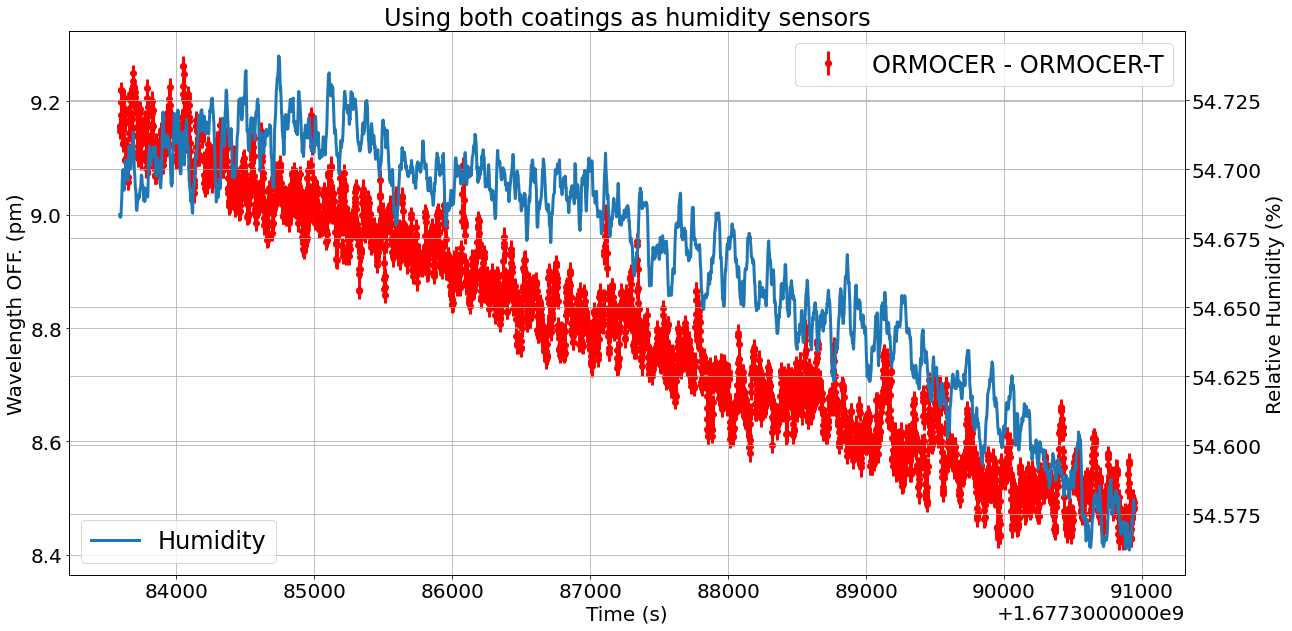

In [66]:
fig, axes = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches((20,10))
twin = axes.twinx()
changes = []
temps = []
hum_changes = []
hum_changes_err = []
tau = 8000
for plateau in plateaus[date].keys():
    if "243_up" not in plateau:
        continue
    t0 = plateaus[date]["213_down"][0]
    tf = plateaus[date]["213_down"][1]
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)]
    refval = np.mean(dcut["pavWav1-1"])*1e12
    t0 = plateaus[date][plateau][0]
    tf = plateaus[date][plateau][1]
    mint, maxt = np.min(dcut["tempT1"]), np.max(dcut["tempT1"])
    axes.errorbar(
        dcut["Timestamp"],
        dcut["pavWav1-2"]*1e12 - dcut["pavWav2-1"]*1e12,
        yerr=dcut["pavWav1-2_err"]*1e12,
        fmt="o",
        label="ORMOCER - ORMOCER-T",
        color="red"
    )
    twin.plot(
        dcut["Timestamp"],
        dcut["humiRH"],
        label="Humidity"
    )

    axes.set_title("Using both coatings as humidity sensors")
    axes.set_xlabel("Time (s)")
    axes.set_ylabel("Wavelength OFF. (pm)")
    twin.set_ylabel("Relative Humidity (%)")
    twin.legend(loc="lower left")
    axes.legend()

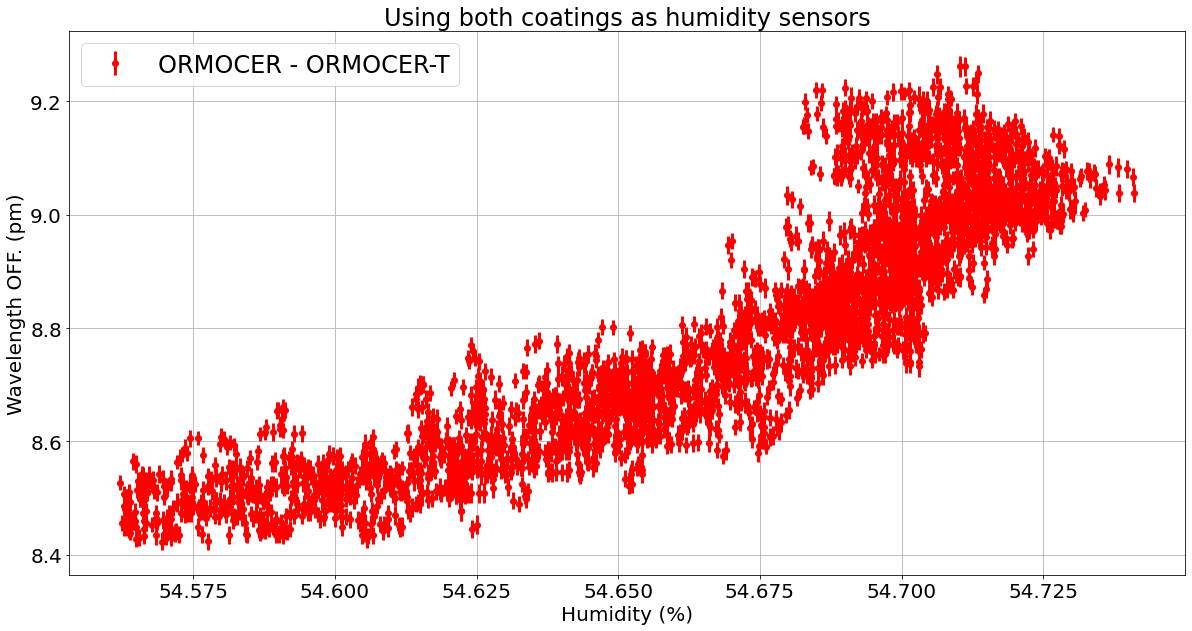

In [65]:
fig, axes = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches((20,10))
changes = []
temps = []
hum_changes = []
hum_changes_err = []
tau = 8000
for plateau in plateaus[date].keys():
    if "243_up" not in plateau:
        continue
    t0 = plateaus[date]["213_down"][0]
    tf = plateaus[date]["213_down"][1]
    dcut = matched.loc[(matched["Timestamp"]>t0+tau)&(matched["Timestamp"]<tf)]
    refval = np.mean(dcut["pavWav1-1"])*1e12
    t0 = plateaus[date][plateau][0]
    tf = plateaus[date][plateau][1]
    mint, maxt = np.min(dcut["tempT1"]), np.max(dcut["tempT1"])
    axes.errorbar(
        dcut["humiRH"],
        dcut["pavWav1-2"]*1e12 - dcut["pavWav2-1"]*1e12,
        yerr=dcut["pavWav1-2_err"]*1e12,
        fmt="o",
        label="ORMOCER - ORMOCER-T",
        color="red"
    )

    axes.set_title("Using both coatings as humidity sensors")
    axes.set_xlabel("Humidity (%)")
    axes.set_ylabel("Wavelength OFF. (pm)")
    axes.legend()

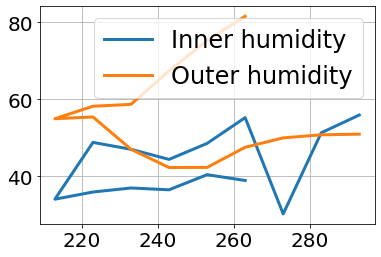

In [239]:
temps = []
hums = []
hums_teoric = []
cnt = 0
for i in range(len(plateaus[date].keys())):
    if cnt == 14:
        break
    plateau = list(plateaus[date].keys())[i]
    post_plateau = list(plateaus[date].keys())[i+1]
    t0 = plateaus[date][plateau][1]
    tf = plateaus[date][post_plateau][0]
    dcut = matched.loc[(matched["Timestamp"]>t0)&(matched["Timestamp"]<tf)]
    
    mint, maxt = np.min(dcut["tempT1"]), np.max(dcut["tempT1"])
    min_ormt, max_ormt = np.min(dcut["pavWav1-1"]*1e12), np.max(dcut["pavWav1-1"]*1e12) 
    min_orm, max_orm = np.min(dcut["pavWav2-2"]*1e12), np.max(dcut["pavWav2-2"]*1e12)
    delta_ormt, delta_orm = (max_ormt-min_ormt), (max_orm-min_orm)
    deltat = (maxt-mint)
    delta_rh = delta_ormt - delta_orm
#     print(delta_ormt, delta_orm, deltat)
#     print(delta_ormt/deltat, delta_orm/deltat)
#     print(delta_rh/1.5)
    temps.append(int(plateau.split("_")[0]))
    hums.append(delta_rh/1.5)
    hums_teoric.append(np.mean(dcut["humiRH"]))
    cnt += 1
    
hums = np.array(hums)
temps = np.array(temps)
hums_teoric = np.array(hums_teoric)
plt.plot(temps, hums - hums[6] +hums_teoric[6], label="Inner humidity")
plt.plot(temps, hums_teoric, label="Outer humidity")
plt.legend()


In [2]:
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
date = "20230328"
tau = 8000
matched = getters.get_processed_data(path+date+"/")
print(matched.columns)

Index(['Timestamp', 'humiObRH', 'humiObRH_err', 'humiRH', 'humiRH_err',
       'humiObT', 'humiObT_err', 'humiT', 'humiT_err', 'pavWav1-1',
       'pavWav1-1_err', 'pavWav1-2', 'pavWav1-2_err', 'pavWav1-3',
       'pavWav1-3_err', 'pavWav1-4', 'pavWav1-4_err', 'pavWav2-1',
       'pavWav2-1_err', 'pavWav2-2', 'pavWav2-2_err', 'pavWav2-3',
       'pavWav2-3_err', 'pavWav2-4', 'pavWav2-4_err', 'ppWav1-1',
       'ppWav1-1_err', 'ppWav1-2', 'ppWav1-2_err', 'ppWav1-3', 'ppWav1-3_err',
       'ppWav1-4', 'ppWav1-4_err', 'ppWav2-1', 'ppWav2-1_err', 'ppWav2-2',
       'ppWav2-2_err', 'ppWav2-3', 'ppWav2-3_err', 'ppWav2-4', 'ppWav2-4_err',
       'psWav1-1', 'psWav1-1_err', 'psWav1-2', 'psWav1-2_err', 'psWav1-3',
       'psWav1-3_err', 'psWav1-4', 'psWav1-4_err', 'psWav2-1', 'psWav2-1_err',
       'psWav2-2', 'psWav2-2_err', 'psWav2-3', 'psWav2-3_err', 'psWav2-4',
       'psWav2-4_err', 'tempT1', 'tempT1_err', 'tempT2', 'tempT2_err',
       'tempT3', 'tempT3_err', 'tempT4', 'tempT4_err'],
    

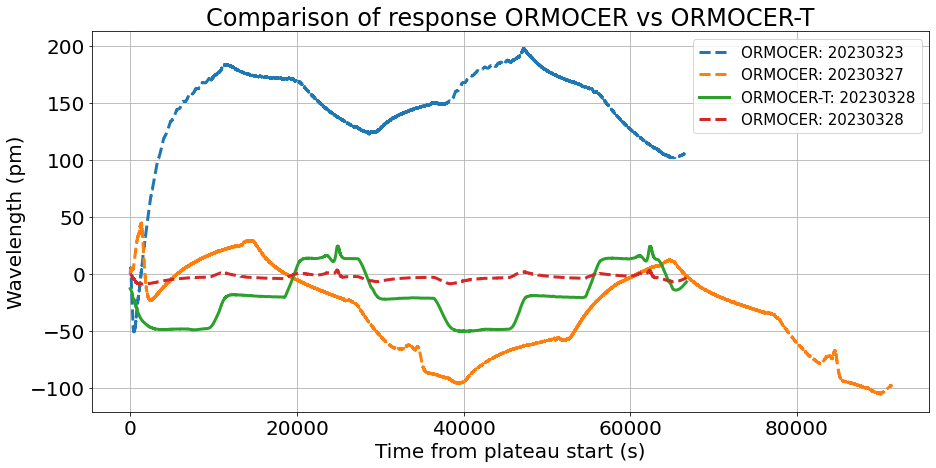

In [29]:
plt.figure(figsize=(15,7))
date = "20230323"
matched = getters.get_processed_data(path+date+"/")
p0 = (matched["pavWav1-2"][0])*1e12
plt.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav1-2"])*1e12 - p0, "--", label="ORMOCER: " + date)
date = "20230327"
matched = getters.get_processed_data(path+date+"/")
p0 = (matched["pavWav1-2"][0])*1e12
plt.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav1-2"])*1e12 - p0, "--", label="ORMOCER: " + date)
date = "20230328"
matched = getters.get_processed_data(path+date+"/")
p0 = (matched["pavWav1-2"][0])*1e12
plt.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav2-2"])*1e12 - p0, label="ORMOCER-T: " + date)
plt.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav1-2"])*1e12 - p0, "--", label="ORMOCER: " +date)
plt.xlabel("Time from plateau start (s)")
plt.ylabel("Wavelength (pm)")
plt.title("Comparison of response ORMOCER vs ORMOCER-T")
plt.legend(fontsize=15)

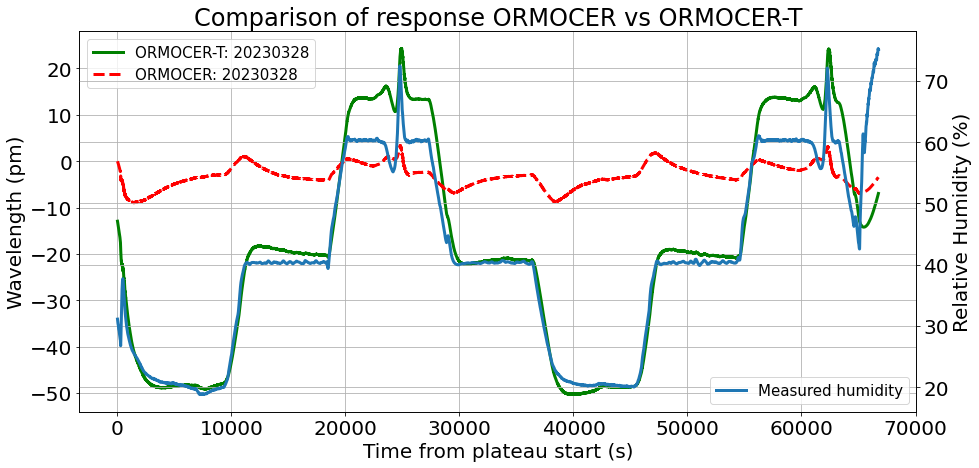

In [41]:
fig, axes = plt.subplots(1, 1)
fig.set_size_inches((15,7))
twin = axes.twinx()
date = "20230328"
matched = getters.get_processed_data(path+date+"/")
p0 = (matched["pavWav1-2"][0])*1e12
twin.plot(matched["Timestamp"] - matched["Timestamp"][0], matched["humiRH"], label="Measured humidity")
axes.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav2-2"])*1e12 - p0, label="ORMOCER-T: " + date, color="green")
axes.plot(matched["Timestamp"] - matched["Timestamp"][0], (matched["pavWav1-2"])*1e12 - p0, "--", label="ORMOCER: " +date, color="red")
axes.set_xlabel("Time from plateau start (s)")
axes.set_ylabel("Wavelength (pm)")
twin.set_ylabel("Relative Humidity (%)")
axes.set_title("Comparison of response ORMOCER vs ORMOCER-T")
axes.legend(fontsize=15)
twin.legend(fontsize=15, loc="lower right")